# 1. Set Up

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Example
input_file_path = '/content/drive/MyDrive/SuperBowl_Project_FUB/Final_Files/03. Output Bild + Ton/output_lists/ADs_IG_2013/AD0252.xlsx'
df_total = pd.read_excel(input_file_path, 'Summary_Gender_Ethnicity')

# Seperate the dataframes for gender and ethnicity
df_gender = df_total.iloc[:, 0:9]
df_ethnicity = df_total.iloc[:, 10:31]

# 2. Heatmap Function


In [ ]:
def draw_heatmap(quadrant_numbers, element, instance):
  data = list(map(int, quadrant_numbers.strip("[]").split(', ')))

  # Create a 3x3 matrix
  heatmap_matrix = np.zeros((3, 3), dtype=int)

  # Fill the matrix with the count of each number in the respective quadrant
  for num in data:
      row = (num - 1) // 3
      col = (num - 1) % 3
      heatmap_matrix[row, col] += 1

  # Calculate the percentage for each quadrant
  total_numbers = len(data)
  heatmap_percentage = (heatmap_matrix / total_numbers) * 100

  # Plot the heatmap
  fig, ax = plt.subplots()
  im = ax.imshow(heatmap_percentage, cmap='Blues', vmax=100., vmin=0.)

  # Display the values in each cell
  for i in range(3):
      for j in range(3):
          text = ax.text(j, i, f"{heatmap_percentage[i, j]:.2f}%", ha='center', va='center', color='#324C85', fontsize=18)

  # Remove axis ticks
  ax.set_xticks([])
  ax.set_yticks([])

  #plt.title(f'Distribution of {element} for the case {instance}.')

  plt.show()

# 3. Gender

## 3.1. Cases

In [ ]:
# Cases for which to create the heapmaps
cases = ['1 Woman', '1 Man', '1 Man & 1 Woman']

## 3.2. Gender Representation



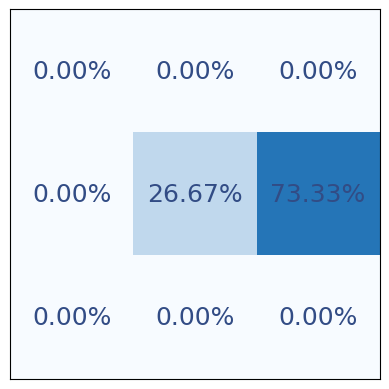

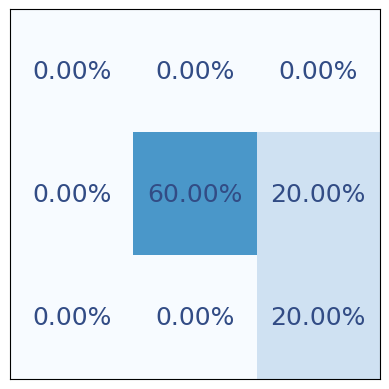

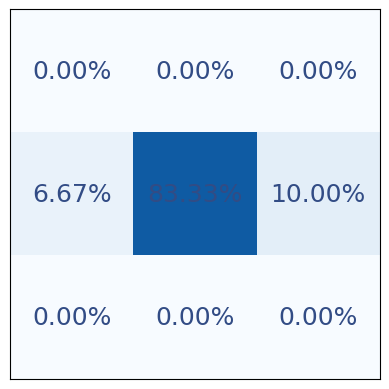

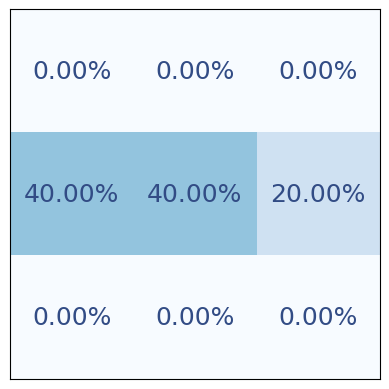

In [ ]:
for gender in ['Women', 'Men']:
  cases_specific_gender = cases.copy()

  if gender == 'Women':
    cases_specific_gender.remove('1 Man')
  else:
    cases_specific_gender.remove('1 Woman')

  for instance in cases_specific_gender:
      # Find the corresponding row in the dataframe for the instance
      case_column = df_gender.columns[0]

      # Convert column values to strings for comparison
      all_cases = list(map(str, df_gender[case_column]))

      # Check if the instance is in the dataframe
      if str(instance) in all_cases:
          row_in_df = all_cases.index(str(instance))

          # Find the quadrant numbers for the instance
          if gender == 'Women':
            quadrant_numbers = df_gender.iloc[row_in_df, 5]
          else:
            quadrant_numbers = df_gender.iloc[row_in_df, 8]

      else:
          print(f"Instance {instance} not found in the dataframe.")

      draw_heatmap(quadrant_numbers, gender, instance)

# 4. Ethnicity

## 4.1. Cases

In [ ]:
# Cases for which to create the heapmaps
cases = ['1 black', '1 asian', '1 asian & 1 black']

## 4.2. Ethnicity Representation



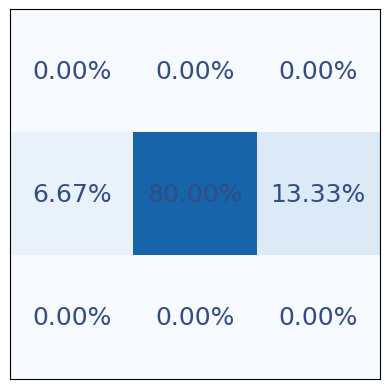

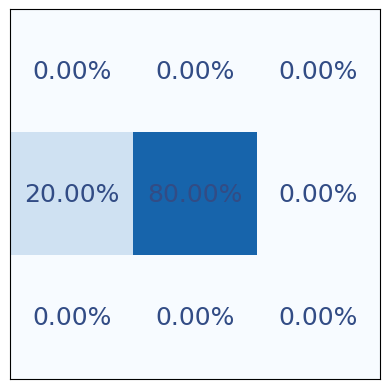

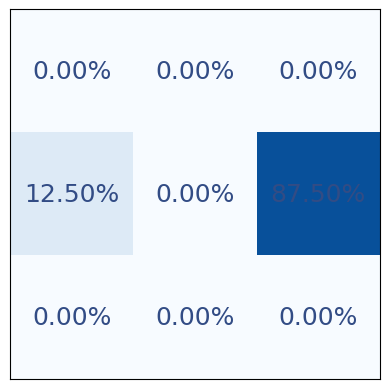

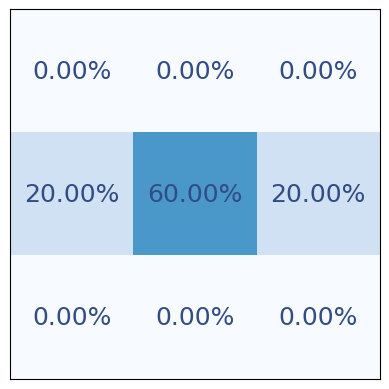

In [ ]:
for ethnicity in ['Black', 'Asian']:
  cases_specific_ethnicity = cases.copy()

  if ethnicity == 'Black':
    cases_specific_ethnicity.remove('1 asian')
  else:
    cases_specific_ethnicity.remove('1 black')

  for instance in cases_specific_ethnicity:
      # Find the corresponding row in the dataframe for the instance
      case_column = df_ethnicity.columns[0]

      # Convert column values to strings for comparison
      all_cases = list(map(str, df_ethnicity[case_column]))

      # Check if the instance is in the dataframe
      if str(instance) in all_cases:
          row_in_df = all_cases.index(str(instance))

          # Find the quadrant numbers for the instance
          if ethnicity == 'Black':
            quadrant_numbers = df_ethnicity.iloc[row_in_df, 8]
          else:
            quadrant_numbers = df_ethnicity.iloc[row_in_df, 5]

      else:
          print(f"Instance {instance} not found in the dataframe.")

      draw_heatmap(quadrant_numbers, ethnicity, instance)